In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv('output.csv')

In [24]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [25]:
df.isnull().sum()

 Review    0
Liked      0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(4)

In [27]:
df=df.drop_duplicates()

In [28]:
df['review_length']=df[' Review'].apply(len)

In [29]:
df.head()

,Review,Liked,review_length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


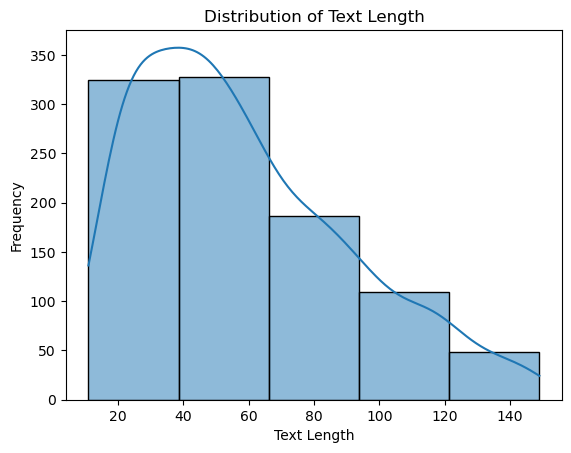

In [30]:
import seaborn as sns
sns.histplot(df['review_length'],bins=5,kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [31]:
df[' Review']= df[' Review'].str.lower()

In [32]:
df.head()

,Review,Liked,review_length
0,wow... loved this place.,1,24
1,crust is not good.,0,18
2,not tasty and the texture was just nasty.,0,41
3,stopped by during the late may bank holiday of...,1,87
4,the selection on the menu was great and so wer...,1,59


In [33]:
import re
def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove punctuation, numbers, and special characters
    text = re.sub('[^a-z]', ' ', text)
    # Remove extra spaces
    text = re.sub('\s+', ' ', text).strip()
    return text

df['Cleaned_Review'] = df[' Review'].apply(clean_text)

In [34]:
from collections import Counter
import re

def get_words(text):
    text=text.lower() 
    text=re.sub(r"[^a-zA-Z\s]","",text)
    words=text.split()
    return words
all_words=df['Cleaned_Review'].apply(get_words).sum()
word_counts=Counter(all_words)
print(word_counts.most_common(20))

[('the', 584), ('and', 393), ('i', 354), ('was', 294), ('a', 237), ('to', 220), ('is', 171), ('it', 153), ('this', 141), ('of', 127), ('food', 125), ('not', 115), ('for', 110), ('in', 109), ('place', 104), ('t', 96), ('good', 95), ('we', 88), ('service', 85), ('very', 76)]


In [35]:
df['tokens']=df['Cleaned_Review'].str.split()

In [36]:
df['token_length']=df['tokens'].apply(len)

In [37]:
df.head()

,Review,Liked,review_length,Cleaned_Review,tokens,token_length
0,wow... loved this place.,1,24,wow loved this place,"[wow, loved, this, place]",4
1,crust is not good.,0,18,crust is not good,"[crust, is, not, good]",4
2,not tasty and the texture was just nasty.,0,41,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]",8
3,stopped by during the late may bank holiday of...,1,87,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...",15
4,the selection on the menu was great and so wer...,1,59,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...",12


In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pranayeni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
stop_words=set(stopwords.words('english'))

In [43]:
from nltk.corpus import stopwords
df['tokens_no_stopwords']=df['tokens'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

In [44]:
df.head()

,Review,Liked,review_length,Cleaned_Review,tokens,token_length,tokens_no_stopwords
0,wow... loved this place.,1,24,wow loved this place,"[wow, loved, this, place]",4,"[wow, loved, place]"
1,crust is not good.,0,18,crust is not good,"[crust, is, not, good]",4,"[crust, good]"
2,not tasty and the texture was just nasty.,0,41,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]",8,"[tasty, texture, nasty]"
3,stopped by during the late may bank holiday of...,1,87,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...",15,"[stopped, late, may, bank, holiday, rick, stev..."
4,the selection on the menu was great and so wer...,1,59,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...",12,"[selection, menu, great, prices]"


In [45]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
df['tokens_lemmatized']=df['tokens_no_stopwords'].apply(
    lambda tokens: [lemmatizer.lemmatize(word,pos='v') for word in tokens]
)

In [46]:
df.head()

,Review,Liked,review_length,Cleaned_Review,tokens,token_length,tokens_no_stopwords,tokens_lemmatized
0,wow... loved this place.,1,24,wow loved this place,"[wow, loved, this, place]",4,"[wow, loved, place]","[wow, love, place]"
1,crust is not good.,0,18,crust is not good,"[crust, is, not, good]",4,"[crust, good]","[crust, good]"
2,not tasty and the texture was just nasty.,0,41,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]",8,"[tasty, texture, nasty]","[tasty, texture, nasty]"
3,stopped by during the late may bank holiday of...,1,87,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...",15,"[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ..."
4,the selection on the menu was great and so wer...,1,59,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...",12,"[selection, menu, great, prices]","[selection, menu, great, price]"


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
a=vectorizer.fit_transform(df['Cleaned_Review'])
print("Vocabulary:",vectorizer.get_feature_names_out())
print("TF-Idf Matrix:\n",a.toarray())

Vocabulary: ['about' 'above' 'absolute' ... 'yum' 'yummy' 'zero']
TF-Idf Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
X=a
y=df['Liked']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(796, 2016)
(796,)
(200, 2016)
(200,)


In [55]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)


BernoulliNB()

In [56]:
y_pred = model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.755
Precision: 0.7350427350427351
Recall: 0.8269230769230769
F1 Score: 0.7782805429864253

Confusion Matrix:
 [[65 31]
 [18 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.73        96
           1       0.74      0.83      0.78       104

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



In [59]:
import pickle

# Save model
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("Pickle files created successfully!")


Pickle files created successfully!


In [60]:
import pickle

# Load model
with open("sentiment_model.pkl", "rb") as f:
    model = pickle.load(f)

# Load vectorizer
with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)
